## Classification (Iris dataset)

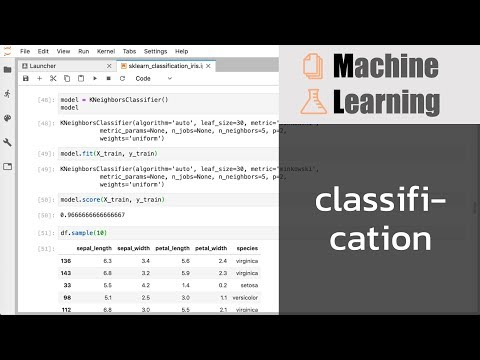

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('n2b_0GTN91Q', width=720, height=405)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
print(f"pandas  version = {pd.__version__}")
print(f"numpy   version = {np.__version__}")
print(f"seaborn version = {sns.__version__}")

pandas  version = 1.3.4
numpy   version = 1.22.4
seaborn version = 0.11.2


In [3]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/iris.csv')
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
30,4.8,3.1,1.6,0.2,setosa
83,6.0,2.7,5.1,1.6,versicolor
92,5.8,2.6,4.0,1.2,versicolor
0,5.1,3.5,1.4,0.2,setosa
142,5.8,2.7,5.1,1.9,virginica
15,5.7,4.4,1.5,0.4,setosa
36,5.5,3.5,1.3,0.2,setosa
108,6.7,2.5,5.8,1.8,virginica
101,5.8,2.7,5.1,1.9,virginica
118,7.7,2.6,6.9,2.3,virginica


In [4]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

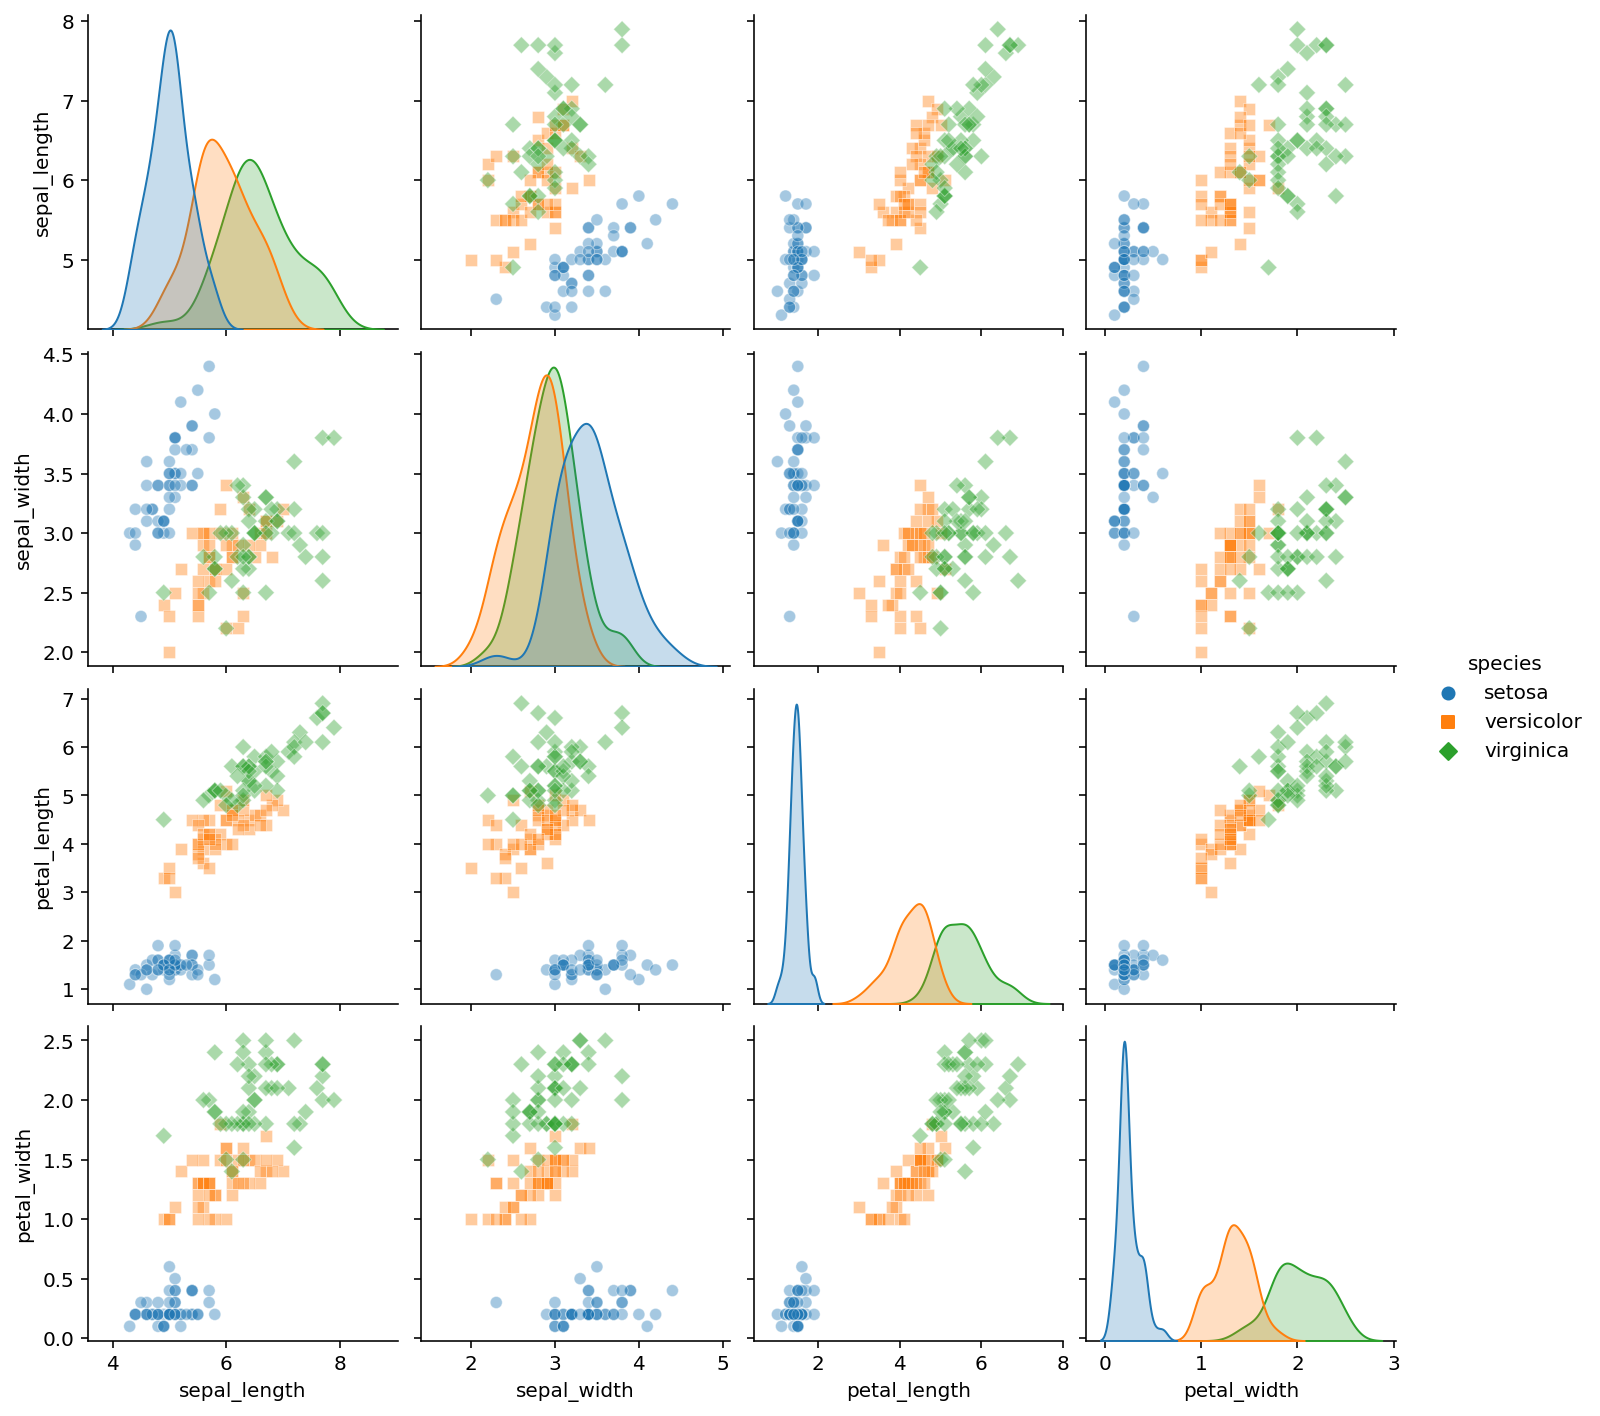

In [8]:
sns.pairplot(df, vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
             hue='species', 
             markers=['o', 's', 'D'],
             plot_kws={'alpha': .4});

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Scikit-learn: KNeighborsClassifier

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [11]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [35]:
# use all data for training
# X_train = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
# y_train = df.species
# y_train = df.species_code

test_size=0.1
X_train, X_test, y_train, y_test = train_test_split(
    df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], 
    df.species, 
    test_size=test_size, random_state=7)

In [36]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
70,5.9,3.2,4.8,1.8
108,6.7,2.5,5.8,1.8
137,6.4,3.1,5.5,1.8
46,5.1,3.8,1.6,0.2
37,4.9,3.1,1.5,0.1


In [37]:
y_train

70     versicolor
108     virginica
137     virginica
46         setosa
37         setosa
          ...    
142     virginica
92     versicolor
103     virginica
67     versicolor
25         setosa
Name: species, Length: 135, dtype: object

In [38]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
149,5.9,3.0,5.1,1.8
84,5.4,3.0,4.5,1.5
40,5.0,3.5,1.3,0.3
66,5.6,3.0,4.5,1.5
106,4.9,2.5,4.5,1.7
41,4.5,2.3,1.3,0.3
52,6.9,3.1,4.9,1.5
94,5.6,2.7,4.2,1.3
11,4.8,3.4,1.6,0.2
51,6.4,3.2,4.5,1.5


In [39]:
model = KNeighborsClassifier()
model

KNeighborsClassifier()

In [40]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
model.score(X_train, y_train)

0.9703703703703703

In [42]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
22,4.6,3.6,1.0,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
104,6.5,3.0,5.8,2.2,virginica
56,6.3,3.3,4.7,1.6,versicolor
139,6.9,3.1,5.4,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
60,5.0,2.0,3.5,1.0,versicolor
148,6.2,3.4,5.4,2.3,virginica
50,7.0,3.2,4.7,1.4,versicolor
74,6.4,2.9,4.3,1.3,versicolor


In [43]:
model.predict([
    [3, 4, 5, 6],
    [3, 4, 5, 2],
    [5, 3.5, 1.5, .2]
              ])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['virginica', 'versicolor', 'setosa'], dtype=object)

In [44]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
* https://en.wikipedia.org/wiki/Confusion_matrix

In [45]:
predicted = model.predict(X_train)
predicted

array(['virginica', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'setosa', 'virginica', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'setosa', 'virginica', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa',

In [46]:
dx=pd.DataFrame({'y_true': y_train, 'y_pred': predicted})
dx[dx.y_true != dx.y_pred]

,y_true,y_pred
70,versicolor,virginica
119,virginica,versicolor
83,versicolor,virginica
72,versicolor,virginica


## scikit-learn: confusion matrix
$$
\begin{bmatrix}
C_{0,0} & C_{0,1} \\
C_{1,0} & C_{1,1}
\end{bmatrix}
=
\begin{bmatrix}
tn&fp \\
fn&tp
\end{bmatrix}
$$

In [47]:
print(confusion_matrix(y_train, predicted))

[[45  0  0]
 [ 0 40  3]
 [ 0  1 46]]


In [48]:
print(accuracy_score(y_train, predicted))

0.9703703703703703


In [49]:
print(classification_report(y_train, predicted))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        45
  versicolor       0.98      0.93      0.95        43
   virginica       0.94      0.98      0.96        47

    accuracy                           0.97       135
   macro avg       0.97      0.97      0.97       135
weighted avg       0.97      0.97      0.97       135



## Logistic Regression

In [50]:
model_b = LogisticRegression()
model_b

LogisticRegression()

In [51]:
model_b.fit(X_train, y_train)

LogisticRegression()

In [52]:
predicted_b = model_b.predict(X_train)
predicted_b

array(['virginica', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'setosa', 'virginica', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'setosa', 'virginica', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa',

In [53]:
print(confusion_matrix(y_train, predicted_b))

[[45  0  0]
 [ 0 41  2]
 [ 0  1 46]]


In [54]:
print(accuracy_score(y_train, predicted_b))

0.9777777777777777


In [55]:
print(classification_report(y_train, predicted_b))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        45
  versicolor       0.98      0.95      0.96        43
   virginica       0.96      0.98      0.97        47

    accuracy                           0.98       135
   macro avg       0.98      0.98      0.98       135
weighted avg       0.98      0.98      0.98       135

